# DeepAFP results

In [23]:
import sys
import os

# To import lib from parent directory
current_dir = os.getcwd()
parent_dir = os.path.abspath( os.path.join(current_dir, "../") )
sys.path.append(parent_dir)

In [24]:
from lib import evaluate
import pandas as pd
import numpy as np

### Specify the result file

In [25]:
result_dir = os.path.join(current_dir, "DeepAFP/1212ANKH-result-20241212020622")
# result_dir = os.path.join(current_dir, "DeepAFP_v1/result-20241205094734")

### Result

In [26]:
result = pd.read_csv(result_dir + "/result.csv")
print(result)

   fold       acc    tn    fp    fn    tp  sensitivity  specificity       mcc  \
0     1  0.619713  1464  1129   831  1730     0.675517     0.564597  0.241560   
1     2  0.631160  1709   881  1020  1544     0.602184     0.659846  0.262483   
2     3  0.630384  1682   892  1013  1567     0.607364     0.653458  0.261096   
3     4  0.622938  1354  1190   753  1856     0.711384     0.532233  0.247745   
4     5  0.613623  1658   925  1066  1504     0.585214     0.641889  0.227476   

        auc  
0  0.671187  
1  0.682536  
2  0.673627  
3  0.678933  
4  0.660207  


In [27]:
metrics = {
    "acc": "acc",
    "sn": "sensitivity",
    "sp": "specificity",
    "mcc": "mcc",
    "auc": "auc",
}

print("Performance average:")
for metric in metrics:
    print("%s\t: %.2f" % (metric, result[metrics[metric]].mean()))

Performance average:
acc	: 0.62
sn	: 0.64
sp	: 0.61
mcc	: 0.25
auc	: 0.67


### ROC Curve

In [28]:
raw_data = pd.read_csv(result_dir + "/raw.csv", header=None)

Convert to numpy

In [29]:
raw_data = raw_data.to_numpy()
print(raw_data.shape)

(10, 5156)


Get true answers and prediction results

In [30]:
answers = []
predictions = []

for i, data in enumerate(raw_data):
    if i % 2 == 0:
        answer = []
        for j in range(1, len(data)):
            if np.isnan(data[j]): # nan is the end of the sequence
                break
            answer.append(data[j])
        answers.append(answer)
    else:
        prediction = []
        for j in range(1, len(data)):
            if np.isnan(data[j]):
                break
            prediction.append(data[j])
        predictions.append(prediction)

print(len(answers), len(predictions))

5 5


Plot ROC curves

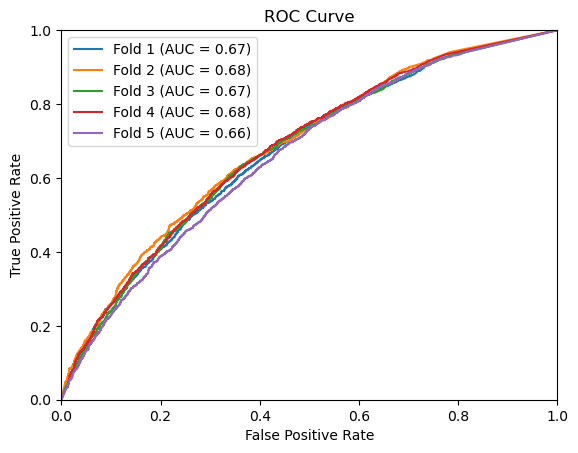

In [31]:
model_perform_dict = {
    "Fold 1": predictions[0],
    "Fold 2": predictions[1],
    "Fold 3": predictions[2],
    "Fold 4": predictions[3],
    "Fold 5": predictions[4],
}

evaluate.ROC_curve_of_cross_validation(answers, model_perform_dict)

In [93]:
def get_folders_with_prefix(path, prefix):
    folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f)) and f.startswith(prefix)]
    return folders

# Example usage
path = os.path.join(current_dir, 'DeepAFP')
print(path)
prefix = "1206GS-"
folders = get_folders_with_prefix(path, prefix)
print(folders)

d:\Programming\Python\113_BioML\exp\DeepAFP
['1206GS-result-20241206022952', '1206GS-result-20241206040123', '1206GS-result-20241206053238', '1206GS-result-20241206070802', '1206GS-result-20241206084444', '1206GS-result-20241206102614', '1206GS-result-20241206120707', '1206GS-result-20241206134817', '1206GS-result-20241206153510', '1206GS-result-20241207032829', '1206GS-result-20241207044219', '1206GS-result-20241207055743', '1206GS-result-20241207071714', '1206GS-result-20241207083859', '1206GS-result-20241207100652', '1206GS-result-20241207113615', '1206GS-result-20241207131633', '1206GS-result-20241207150315']


### whole process

In [113]:
def DeepAFP_result(result_dir, show=True):
    result_data = pd.read_csv(os.path.join(result_dir, "result.csv"))
    
    metrics = {
        "acc": "acc",
        "sn": "sensitivity",
        "sp": "specificity",
        "mcc": "mcc",
        "auc": "auc",
    }

    result = {}

    if show:
        print("Performance average:")
    for metric in metrics:
        result[metric] = result_data[metrics[metric]].mean()
        if show:
            print("%s\t: %.2f" % (metric, result[metric]))

    result["folder"] = result_dir

    return result


def DeepAFP_ROC(result_dir):
    raw_data = pd.read_csv(result_dir + "/raw.csv", header=None)
    raw_data = raw_data.to_numpy()

    answers = []
    predictions = []

    for i, data in enumerate(raw_data):
        if i % 2 == 0:
            answer = []
            for j in range(1, len(data)):
                if np.isnan(data[j]): # nan is the end of the sequence
                    break
                answer.append(data[j])
            answers.append(answer)
        else:
            prediction = []
            for j in range(1, len(data)):
                if np.isnan(data[j]):
                    break
                prediction.append(data[j])
            predictions.append(prediction)
        
    model_perform_dict = {
        "Fold 1": predictions[0],
        "Fold 2": predictions[1],
        "Fold 3": predictions[2],
        "Fold 4": predictions[3],
        "Fold 5": predictions[4],
    }

    evaluate.ROC_curve_of_cross_validation(answers, model_perform_dict)

In [132]:
results = []

for folder in folders:
    print(folder)
    results.append(DeepAFP_result(os.path.join(path, folder), show=False))

1206GS-result-20241206022952
1206GS-result-20241206040123
1206GS-result-20241206053238
1206GS-result-20241206070802
1206GS-result-20241206084444
1206GS-result-20241206102614
1206GS-result-20241206120707
1206GS-result-20241206134817
1206GS-result-20241206153510
1206GS-result-20241207032829
1206GS-result-20241207044219
1206GS-result-20241207055743
1206GS-result-20241207071714
1206GS-result-20241207083859
1206GS-result-20241207100652
1206GS-result-20241207113615
1206GS-result-20241207131633
1206GS-result-20241207150315


d:\Programming\Python\113_BioML\exp\DeepAFP\1206GS-result-20241207113615
Performance average:
acc	: 0.66
sn	: 0.64
sp	: 0.67
mcc	: 0.31
auc	: 0.72


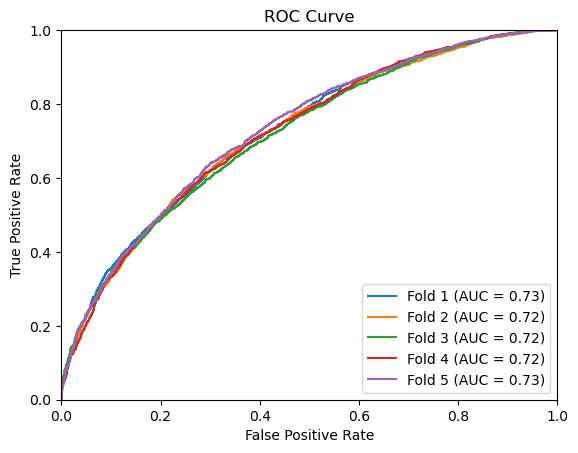

In [133]:
sort_by = ['mcc', 'auc', 'acc', 'sn', 'sp']
sort_by.reverse()

for key in sort_by:
    sorted_results = []
    while len(results) > 0:
        max = -1
        for result in results:
            if result[key] > max:
                max = result[key]
                max_result = result
        sorted_results.append(max_result)
        results.remove(max_result)
    results = sorted_results

# Best model
print(results[0]["folder"])
DeepAFP_result(results[0]["folder"])
DeepAFP_ROC(results[0]["folder"])